In [1]:
import pandas as pd
import dalmatian as dm
from taigapy import TaigaClient
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from cds import plotting
from mgenepy.utils import helper
from taigapy import create_taiga_client_v3

tc = TaigaClient()

In [2]:
OmicsDefaultModelConditionProfiles = tc.get(name='internal-23q4-ac2b', version=68, file='OmicsDefaultModelConditionProfiles')
OmicsDefaultModelProfiles = tc.get(name='internal-23q4-ac2b', version=68, file='OmicsDefaultModelProfiles')

In [3]:
#%%capture

OmicsExpressionAllGenesTPMLogp1Profile = tc.get(name='internal-23q4-ac2b', version=68, file='OmicsExpressionAllGenesTPMLogp1Profile')

In [4]:
mybiomart = helper.generateGeneNames(ensemble_server="http://nov2020.archive.ensembl.org/biomart", useCache=False)
protcod_rename = {}
for _, i in mybiomart[
    (~mybiomart.entrezgene_id.isna()) & (mybiomart.gene_biotype == "protein_coding")
].iterrows():
    if i.ensembl_gene_id not in protcod_rename:
        protcod_rename.update(
            {
                i.hgnc_symbol + " (" + i.ensembl_gene_id + ")": i.hgnc_symbol
                + " ("
                + str(int(i.entrezgene_id))
                + ")"
            }
        )

downloading gene names from biomart


In [5]:
OmicsExpressionAllGenesTPMLogp1Profile.columns = OmicsExpressionAllGenesTPMLogp1Profile.columns.map(protcod_rename)
OmicsExpressionAllGenesTPMLogp1Profile = OmicsExpressionAllGenesTPMLogp1Profile.loc[:, ~OmicsExpressionAllGenesTPMLogp1Profile.columns.isnull()]

In [6]:
OmicsExpressionAllGenesTPMLogp1Profile.head()

,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),NFYA (4800),...,H3C2 (8358),H3C3 (8352),AC098582.1 (8916),DUS4L-BCAP29 (115253422),C8orf44-SGK3 (100533105),ELOA3B (728929),NPBWR1 (2831),ELOA3D (100506888),ELOA3 (162699),CDR1 (1038)
PR-AdBjpG,4.331992,0.000000,7.364660,2.792855,4.471187,0.028569,1.226509,3.044394,6.500005,4.739848,...,2.689299,0.189034,0.201634,2.130931,0.555816,0.0,0.275007,0.0,0.0,0.000000
PR-I2AzwG,4.567424,0.584963,7.106641,2.543496,3.504620,0.000000,0.189034,3.813525,4.221877,3.481557,...,1.286881,1.049631,0.321928,1.464668,0.632268,0.0,0.014355,0.0,0.0,0.000000
PR-5ekAAC,3.150560,0.000000,7.379118,2.333424,4.228049,0.056584,1.310340,6.687201,3.682573,3.273516,...,0.594549,1.097611,0.831877,2.946731,0.475085,0.0,0.084064,0.0,0.0,0.042644
PR-DuAy1L,4.240314,0.000000,5.681168,2.063503,1.641546,0.000000,7.236301,5.948367,4.596935,2.918386,...,0.000000,0.000000,0.847997,1.887525,0.176323,0.0,0.000000,0.0,0.0,0.000000
PR-pGHJuj,4.032101,0.000000,6.674687,2.117695,3.003602,0.000000,2.169925,6.838195,3.253989,4.276497,...,0.238787,0.378512,0.584963,1.748461,0.839960,0.0,0.014355,0.0,0.0,0.042644


In [7]:
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA(n_components=10, whiten=True, random_state=999)
components = pca.fit_transform(OmicsExpressionAllGenesTPMLogp1Profile.loc[:, OmicsExpressionAllGenesTPMLogp1Profile.var(axis=0).sort_values().tail(5000).index])

In [8]:
OmicsDefaultModelConditionProfiles.head()

,ModelConditionID,ProfileID,ProfileType
0,MC-000372-lJjw,PR-DDO590,rna
1,MC-000594-xFjb,PR-CHMLzF,rna
2,MC-000594-xFjb,PR-wBrNnr,dna
3,MC-001603-5VOk,PR-VHuCQ4,dna
4,MC-000609-rR5h,PR-HPBJ3f,rna


In [9]:
OmicsDefaultModelProfiles.head()

,ModelID,ProfileID,ProfileType
0,ACH-000629,PR-CPuQvQ,rna
1,ACH-000905,PR-Zbxz7C,rna
2,ACH-000905,PR-uWKgcA,dna
3,ACH-000358,PR-fqjQgt,rna
4,ACH-000358,PR-TwNLyX,dna


In [10]:
wm = dm.WorkspaceManager("broad-firecloud-ccle/DepMap_hg38_RNAseq")
terra_rnaseq_df = wm.get_samples()

In [11]:
inputs = terra_rnaseq_df.rna_strand_output[~terra_rnaseq_df.rna_strand_output.isnull()]

In [12]:
profile_ids = terra_rnaseq_df.ProfileID[~terra_rnaseq_df.rna_strand_output.isnull()]

In [13]:
profile_ids.isnull().sum()

1712

In [14]:
terra_rnaseq_df.rna_strand_output.isnull().sum()

1

In [15]:
def load_rnaseqc(terra_path):
    rnaseqc_count_df = pd.read_csv(terra_path, sep=':', skiprows=3, header=None, index_col=0)
    return rnaseqc_count_df

In [16]:
from multiprocessing import Pool
pool = Pool(12)
strand_count_dfs = pool.map(load_rnaseqc, inputs)
pool.close()

In [17]:
strand_count_dfs = pd.concat(strand_count_dfs, axis=1)
strand_count_dfs = strand_count_dfs.T

In [18]:
strand_count_dfs.index = inputs.index

In [19]:
meta = pd.read_table("~/all_meta_oncotree.tsv")

/home/ubuntu/depmap_omics/sandbox/vcf2maf/tmp/ipykernel_10847/1524501432.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_table("~/all_meta_oncotree.tsv")


In [20]:
strand_count_dfs.head()

,Fraction of reads failed to determine,"Fraction of reads explained by ""1++,1--,2+-,2-+""","Fraction of reads explained by ""1+-,1-+,2++,2--"""
sample_id,,,
CDS-010xbm,0.0259,0.0212,0.9528
CDS-02TzJp,0.0301,0.0153,0.9546
CDS-04NSe4,0.0135,0.0304,0.9560
CDS-0693hw,0.0142,0.0101,0.9757
CDS-07Plat,0.0234,0.0079,0.9687


In [21]:
strand_count_dfs.loc[:, "Profile"] = strand_count_dfs.index.map(dict(zip(meta.MainSequencingID, meta.ProfileID)))

In [22]:
strand_count_dfs.tail(50)

,Fraction of reads failed to determine,"Fraction of reads explained by ""1++,1--,2+-,2-+""","Fraction of reads explained by ""1+-,1-+,2++,2--""",Profile
sample_id,,,,
CDS-zHCZpH,0.0112,0.0119,0.9769,PR-inE6KT
CDS-ZHLZPA,0.0114,0.4969,0.4917,PR-f2uXcc
CDS-ZIM53z,0.0333,0.4885,0.4783,PR-kCzPyo
CDS-zIy2bR,0.0104,0.0246,0.9649,PR-SO1Iqx
CDS-ZJ0vfV,0.0128,0.4966,0.4906,PR-yY41qu
CDS-zj0WEj,0.0193,0.4925,0.4882,PR-aiDTwa
CDS-zj4E4s,0.0245,0.0144,0.9611,PR-MECfqO
CDS-zkgCPO,0.0196,0.4905,0.4899,PR-GF1Lzy
CDS-ZkhxcF,0.0160,0.4949,0.4892,PR-POuPl0


In [23]:
strand_count_dfs.loc[:, 'strandness'] = strand_count_dfs.iloc[:, 2] > 0.7

In [24]:
strand_count_dfs.to_csv("rna_strandness_24q2.csv")

In [39]:
%pwd

'/home/ubuntu/depmap_omics/ccle_tasks'

<Axes: xlabel='Fraction of reads explained by "1+-,1-+,2++,2--"', ylabel='Density'>

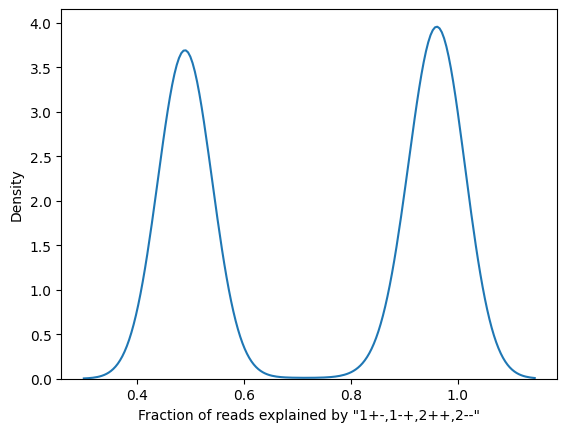

In [25]:
import seaborn as sns
sns.kdeplot(strand_count_dfs.iloc[:, 2])

In [26]:
OmicsExpressionAllGenesTPMLogp1Profile.head()

,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),NFYA (4800),...,H3C2 (8358),H3C3 (8352),AC098582.1 (8916),DUS4L-BCAP29 (115253422),C8orf44-SGK3 (100533105),ELOA3B (728929),NPBWR1 (2831),ELOA3D (100506888),ELOA3 (162699),CDR1 (1038)
PR-AdBjpG,4.331992,0.000000,7.364660,2.792855,4.471187,0.028569,1.226509,3.044394,6.500005,4.739848,...,2.689299,0.189034,0.201634,2.130931,0.555816,0.0,0.275007,0.0,0.0,0.000000
PR-I2AzwG,4.567424,0.584963,7.106641,2.543496,3.504620,0.000000,0.189034,3.813525,4.221877,3.481557,...,1.286881,1.049631,0.321928,1.464668,0.632268,0.0,0.014355,0.0,0.0,0.000000
PR-5ekAAC,3.150560,0.000000,7.379118,2.333424,4.228049,0.056584,1.310340,6.687201,3.682573,3.273516,...,0.594549,1.097611,0.831877,2.946731,0.475085,0.0,0.084064,0.0,0.0,0.042644
PR-DuAy1L,4.240314,0.000000,5.681168,2.063503,1.641546,0.000000,7.236301,5.948367,4.596935,2.918386,...,0.000000,0.000000,0.847997,1.887525,0.176323,0.0,0.000000,0.0,0.0,0.000000
PR-pGHJuj,4.032101,0.000000,6.674687,2.117695,3.003602,0.000000,2.169925,6.838195,3.253989,4.276497,...,0.238787,0.378512,0.584963,1.748461,0.839960,0.0,0.014355,0.0,0.0,0.042644


<Axes: xlabel='comp1', ylabel='comp2'>

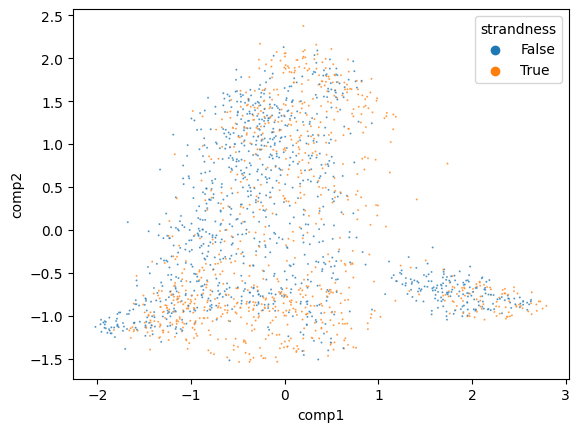

In [27]:
pca_plot_data = pd.DataFrame({"comp1": components[:, 0], "comp2": components[:, 1], "strandness": OmicsExpressionAllGenesTPMLogp1Profile.index.map(dict(zip(strand_count_dfs.Profile, strand_count_dfs.loc[:, 'strandness'])))})
sns.scatterplot(data=pca_plot_data, x="comp1", y="comp2", hue="strandness", alpha=0.8, s=2)

<Axes: xlabel='comp1', ylabel='comp2'>

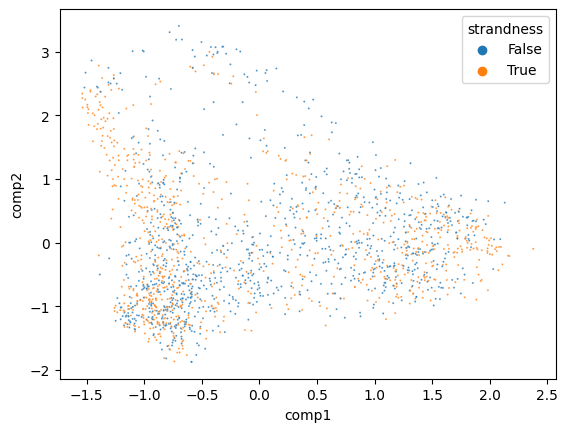

In [28]:
pca_plot_data = pd.DataFrame({"comp1": components[:, 1], "comp2": components[:, 2], "strandness": OmicsExpressionAllGenesTPMLogp1Profile.index.map(dict(zip(strand_count_dfs.Profile, strand_count_dfs.loc[:, 'strandness'])))})
sns.scatterplot(data=pca_plot_data, x="comp1", y="comp2", hue="strandness", alpha=0.8, s=2)

<Axes: xlabel='comp1', ylabel='comp2'>

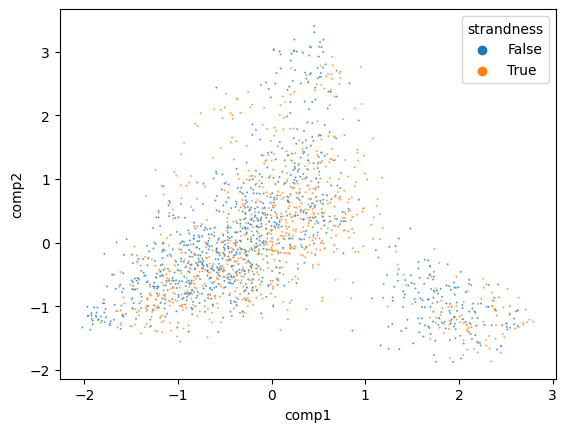

In [29]:
pca_plot_data = pd.DataFrame({"comp1": components[:, 0], "comp2": components[:, 2], "strandness": OmicsExpressionAllGenesTPMLogp1Profile.index.map(dict(zip(strand_count_dfs.Profile, strand_count_dfs.loc[:, 'strandness'])))})
sns.scatterplot(data=pca_plot_data, x="comp1", y="comp2", hue="strandness", alpha=0.8, s=2)

In [30]:
import umap
u = umap.UMAP()
umap_rna = u.fit_transform(components)


/home/ubuntu/mambaforge/envs/cds-omics/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ubuntu/mambaforge/envs/cds-omics/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ubuntu/mambaforge/envs/cds-omics/lib/python3.9/site-packag

In [32]:
model_dataset = pd.read_csv("~/23Q4_model.csv", index_col=0)

In [33]:
model_dataset.head()

,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,LegacyMolecularSubtype,PatientMolecularSubtype,...,TissueOrigin,CCLEName,CatalogNumber,PlateCoating,ModelDerivationMaterial,PublicComments,WTSIMasterCellID,SangerModelID,COSMICID,LegacySubSubtype
ModelID,,,,,,,,,,,,,,,,,,,,,
ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,HGSOC,Ovary/Fallopian Tube,Ovarian Epithelial Tumor,High-Grade Serous Ovarian Cancer,HGSOC,NaN,NaN,...,NaN,NIHOVCAR3_OVARY,HTB-71,None,NaN,NaN,2201.0,SIDM00105,905933.0,high_grade_serous
ACH-000002,PT-5qa3uk,HL-60,HL60,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,NaN,...,NaN,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CCL-240,None,NaN,NaN,55.0,SIDM00829,905938.0,M3
ACH-000003,PT-puKIyc,CACO2,CACO2,COAD,Bowel,Colorectal Adenocarcinoma,Colon Adenocarcinoma,COAD,NaN,NaN,...,NaN,CACO2_LARGE_INTESTINE,HTB-37,None,NaN,NaN,NaN,SIDM00891,NaN,NaN
ACH-000004,PT-q4K2cp,HEL,HEL,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,NaN,...,NaN,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ACC 11,None,NaN,NaN,783.0,SIDM00594,907053.0,M6
ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,NaN,...,NaN,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HEL9217,None,NaN,NaN,NaN,SIDM00593,NaN,M6


In [34]:
OmicsExpressionAllGenesTPMLogp1Profile

,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),NFYA (4800),...,H3C2 (8358),H3C3 (8352),AC098582.1 (8916),DUS4L-BCAP29 (115253422),C8orf44-SGK3 (100533105),ELOA3B (728929),NPBWR1 (2831),ELOA3D (100506888),ELOA3 (162699),CDR1 (1038)
PR-AdBjpG,4.331992,0.000000,7.364660,2.792855,4.471187,0.028569,1.226509,3.044394,6.500005,4.739848,...,2.689299,0.189034,0.201634,2.130931,0.555816,0.000000,0.275007,0.0,0.000000,0.000000
PR-I2AzwG,4.567424,0.584963,7.106641,2.543496,3.504620,0.000000,0.189034,3.813525,4.221877,3.481557,...,1.286881,1.049631,0.321928,1.464668,0.632268,0.000000,0.014355,0.0,0.000000,0.000000
PR-5ekAAC,3.150560,0.000000,7.379118,2.333424,4.228049,0.056584,1.310340,6.687201,3.682573,3.273516,...,0.594549,1.097611,0.831877,2.946731,0.475085,0.000000,0.084064,0.0,0.000000,0.042644
PR-DuAy1L,4.240314,0.000000,5.681168,2.063503,1.641546,0.000000,7.236301,5.948367,4.596935,2.918386,...,0.000000,0.000000,0.847997,1.887525,0.176323,0.000000,0.000000,0.0,0.000000,0.000000
PR-pGHJuj,4.032101,0.000000,6.674687,2.117695,3.003602,0.000000,2.169925,6.838195,3.253989,4.276497,...,0.238787,0.378512,0.584963,1.748461,0.839960,0.000000,0.014355,0.0,0.000000,0.042644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PR-ACNZor,0.056584,0.000000,6.604368,3.266037,4.973152,0.411426,0.097611,0.704872,4.829850,5.178715,...,2.229588,0.084064,1.310340,3.039138,0.344828,0.000000,0.000000,0.0,0.475085,0.042644
PR-eZ3iv8,3.111031,0.000000,7.031329,1.541019,3.664483,0.014355,3.624101,6.805421,4.472488,4.397118,...,0.189034,0.400538,0.356144,1.327687,0.000000,0.000000,0.014355,0.0,0.000000,0.000000
PR-RWNv81,4.390943,0.000000,7.013239,1.887525,3.252476,0.028569,3.286881,6.902194,5.410748,3.401903,...,1.097611,0.400538,0.613532,1.992768,0.704872,0.000000,1.464668,0.0,0.000000,0.526069
PR-IVFp8S,5.057450,0.000000,7.815191,2.538538,3.893362,0.028569,4.079805,6.971659,4.469886,3.463361,...,0.831877,0.847997,1.292782,2.153805,0.687061,0.000000,0.000000,0.0,0.000000,0.000000


In [35]:
OmicsExpressionAllGenesTPMLogp1Profile.head()

,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),NFYA (4800),...,H3C2 (8358),H3C3 (8352),AC098582.1 (8916),DUS4L-BCAP29 (115253422),C8orf44-SGK3 (100533105),ELOA3B (728929),NPBWR1 (2831),ELOA3D (100506888),ELOA3 (162699),CDR1 (1038)
PR-AdBjpG,4.331992,0.000000,7.364660,2.792855,4.471187,0.028569,1.226509,3.044394,6.500005,4.739848,...,2.689299,0.189034,0.201634,2.130931,0.555816,0.0,0.275007,0.0,0.0,0.000000
PR-I2AzwG,4.567424,0.584963,7.106641,2.543496,3.504620,0.000000,0.189034,3.813525,4.221877,3.481557,...,1.286881,1.049631,0.321928,1.464668,0.632268,0.0,0.014355,0.0,0.0,0.000000
PR-5ekAAC,3.150560,0.000000,7.379118,2.333424,4.228049,0.056584,1.310340,6.687201,3.682573,3.273516,...,0.594549,1.097611,0.831877,2.946731,0.475085,0.0,0.084064,0.0,0.0,0.042644
PR-DuAy1L,4.240314,0.000000,5.681168,2.063503,1.641546,0.000000,7.236301,5.948367,4.596935,2.918386,...,0.000000,0.000000,0.847997,1.887525,0.176323,0.0,0.000000,0.0,0.0,0.000000
PR-pGHJuj,4.032101,0.000000,6.674687,2.117695,3.003602,0.000000,2.169925,6.838195,3.253989,4.276497,...,0.238787,0.378512,0.584963,1.748461,0.839960,0.0,0.014355,0.0,0.0,0.042644


In [44]:
model_dataset.head()

,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,LegacyMolecularSubtype,PatientMolecularSubtype,...,TissueOrigin,CCLEName,CatalogNumber,PlateCoating,ModelDerivationMaterial,PublicComments,WTSIMasterCellID,SangerModelID,COSMICID,LegacySubSubtype
ModelID,,,,,,,,,,,,,,,,,,,,,
ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,HGSOC,Ovary/Fallopian Tube,Ovarian Epithelial Tumor,High-Grade Serous Ovarian Cancer,HGSOC,NaN,NaN,...,NaN,NIHOVCAR3_OVARY,HTB-71,None,NaN,NaN,2201.0,SIDM00105,905933.0,high_grade_serous
ACH-000002,PT-5qa3uk,HL-60,HL60,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,NaN,...,NaN,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CCL-240,None,NaN,NaN,55.0,SIDM00829,905938.0,M3
ACH-000003,PT-puKIyc,CACO2,CACO2,COAD,Bowel,Colorectal Adenocarcinoma,Colon Adenocarcinoma,COAD,NaN,NaN,...,NaN,CACO2_LARGE_INTESTINE,HTB-37,None,NaN,NaN,NaN,SIDM00891,NaN,NaN
ACH-000004,PT-q4K2cp,HEL,HEL,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,NaN,...,NaN,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ACC 11,None,NaN,NaN,783.0,SIDM00594,907053.0,M6
ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,NaN,...,NaN,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HEL9217,None,NaN,NaN,NaN,SIDM00593,NaN,M6


In [45]:
OmicsDefaultModelProfiles = tc.get(name='internal-23q4-ac2b', version=68, file='OmicsDefaultModelProfiles')

profile_to_model_dict = OmicsDefaultModelProfiles.query("ProfileType == 'rna'").\
        set_index("ProfileID").\
        drop("ProfileType", axis=1).\
        to_dict()["ModelID"]

In [49]:
lineage = OmicsExpressionAllGenesTPMLogp1Profile.index.map(profile_to_model_dict).map(model_dataset.OncotreeLineage.to_dict())

In [64]:
pca_plot_data = pd.DataFrame({"lineage": lineage, "strandness": OmicsExpressionAllGenesTPMLogp1Profile.index.map(dict(zip(strand_count_dfs.Profile, strand_count_dfs.loc[:, 'strandness'])))})

In [107]:
stat = pd.crosstab(pca_plot_data.iloc[:, 0], pca_plot_data.iloc[:, 1])
stat.melt(ignore_index=False).reset_index()

,lineage,strandness,value
0,Adrenal Gland,False,0
1,Ampulla of Vater,False,2
2,Biliary Tract,False,6
3,Bladder/Urinary Tract,False,26
4,Bone,False,18
...,...,...,...
61,Soft Tissue,True,54
62,Testis,True,8
63,Thyroid,True,12
64,Uterus,True,11


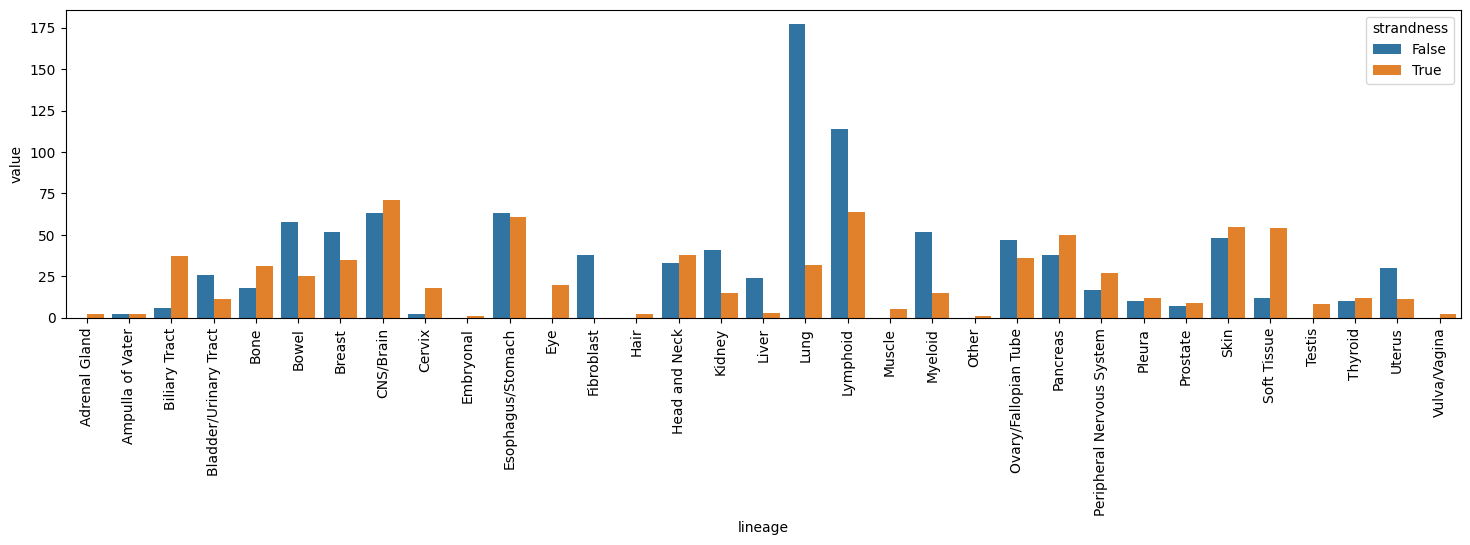

In [111]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 4)
g = sns.barplot(data=stat.melt(ignore_index=False).reset_index(), x='lineage', y='value', hue='strandness')
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [98]:
stat.loc[:, 'bias'] = stat.iloc[:, 1] - stat.iloc[:, 0]

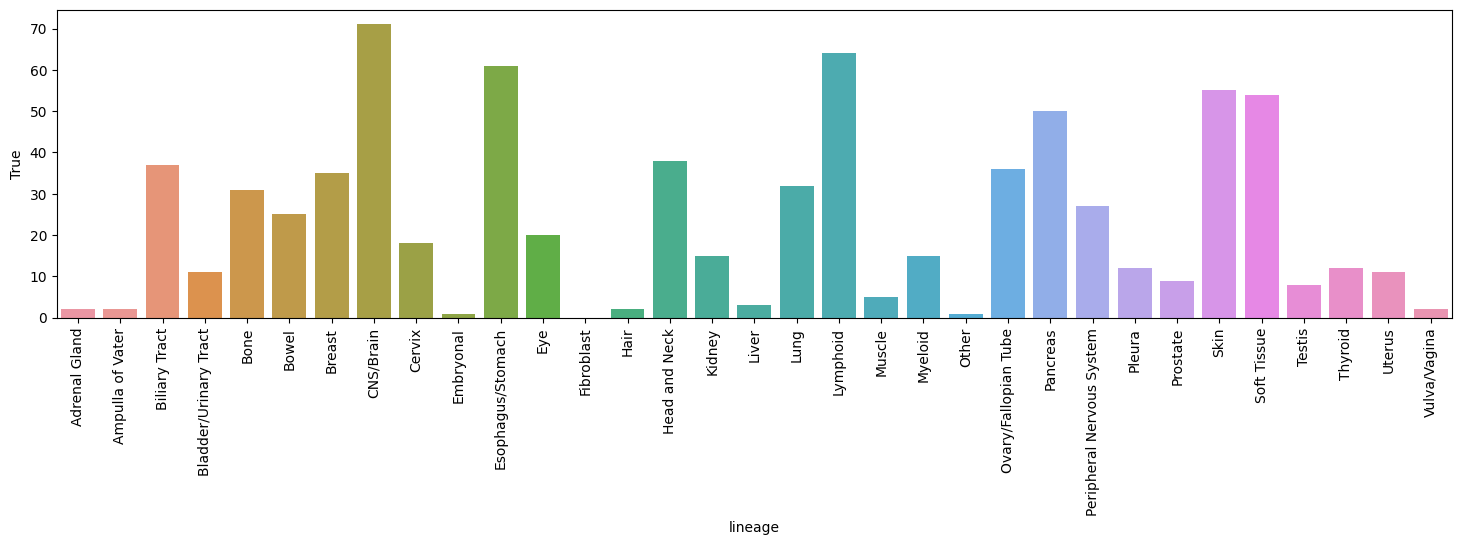

In [99]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 4)
#g = sns.barplot(data=stat.reset_index(), x='lineage', y='bias', ax=ax)
#g = sns.barplot(data=stat.melt(), x='lineage', y=False, ax=ax, hue='strandness')
g = sns.barplot(data=(stat).reset_index(), x='lineage', y=True, ax=ax)
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)

/home/ubuntu/depmap_omics/sandbox/vcf2maf/tmp/ipykernel_10847/1377208387.py:16: UserWarning: The palette list has more values (33) than needed (2), which may not be intended.
  sns.scatterplot(data=pca_plot_data, x="comp1", y="comp2", hue="strandness", alpha=0.8, s=8, ax=ax[i][0], palette=palette)
/home/ubuntu/depmap_omics/sandbox/vcf2maf/tmp/ipykernel_10847/1377208387.py:21: UserWarning: The palette list has more values (33) than needed (2), which may not be intended.
  sns.scatterplot(data=pca_plot_data, x="comp1", y="comp2", hue="strandness", alpha=0.8, s=8, ax=ax[i][1], palette=palette)
/home/ubuntu/depmap_omics/sandbox/vcf2maf/tmp/ipykernel_10847/1377208387.py:16: UserWarning: The palette list has more values (33) than needed (2), which may not be intended.
  sns.scatterplot(data=pca_plot_data, x="comp1", y="comp2", hue="strandness", alpha=0.8, s=8, ax=ax[i][0], palette=palette)
/home/ubuntu/depmap_omics/sandbox/vcf2maf/tmp/ipykernel_10847/1377208387.py:21: UserWarning: The palett

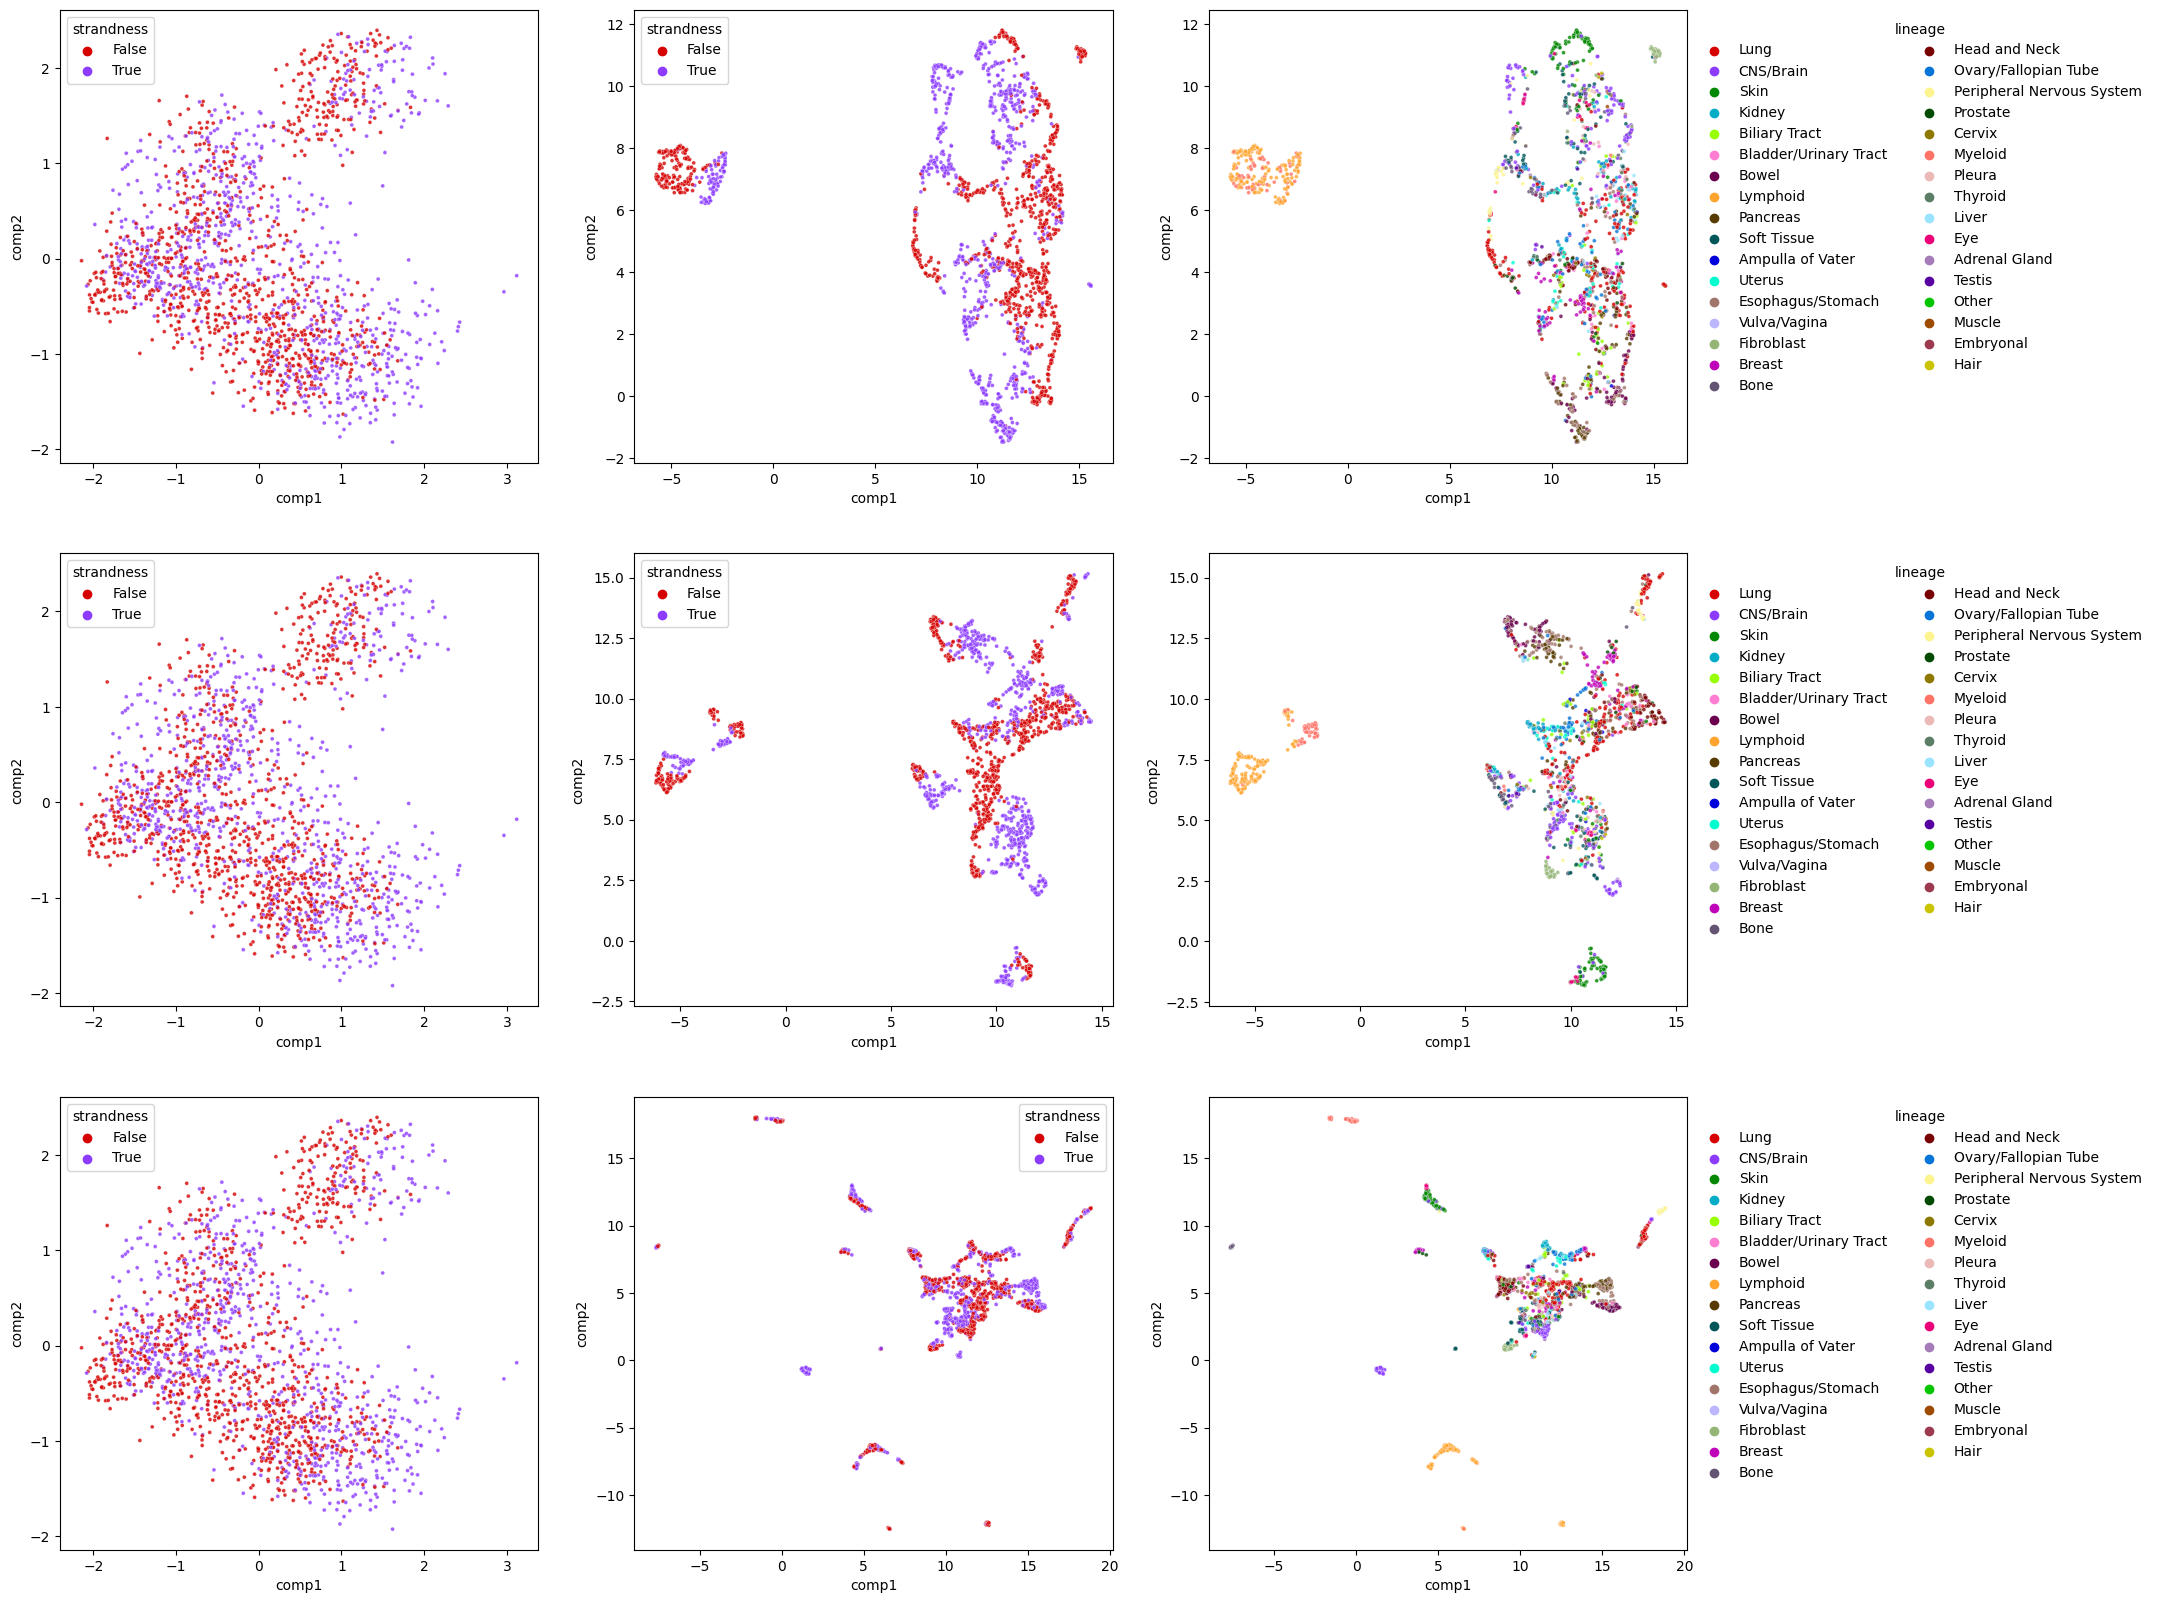

In [57]:
from sklearn.decomposition import PCA
import pandas as pd
import colorcet as cc
import umap
u = umap.UMAP()
palette = sns.color_palette(cc.glasbey, n_colors=33)


fig, ax = plt.subplots(3, 3)
fig.set_size_inches(21, 20)

for i, comp_number in enumerate([5, 10, 30]):
    pca = PCA(n_components=comp_number, whiten=True, random_state=999)
    components = pca.fit_transform(OmicsExpressionAllGenesTPMLogp1Profile)
    pca_plot_data = pd.DataFrame({"comp1": components[:, 0], "comp2": components[:, 1], "lineage": lineage, "strandness": OmicsExpressionAllGenesTPMLogp1Profile.index.map(dict(zip(strand_count_dfs.Profile, strand_count_dfs.loc[:, 'strandness'])))})
    sns.scatterplot(data=pca_plot_data, x="comp1", y="comp2", hue="strandness", alpha=0.8, s=8, ax=ax[i][0], palette=palette)
    
    umap_rna = u.fit_transform(components)
    
    pca_plot_data = pd.DataFrame({"comp1": umap_rna[:, 0], "comp2": umap_rna[:, 1], "lineage": lineage, "strandness": OmicsExpressionAllGenesTPMLogp1Profile.index.map(dict(zip(strand_count_dfs.Profile, strand_count_dfs.loc[:, 'strandness'])))})
    sns.scatterplot(data=pca_plot_data, x="comp1", y="comp2", hue="strandness", alpha=0.8, s=8, ax=ax[i][1], palette=palette)

    pca_plot_data = pd.DataFrame({"comp1": umap_rna[:, 0], "comp2": umap_rna[:, 1], "lineage": lineage, "strandness": OmicsExpressionAllGenesTPMLogp1Profile.index.map(dict(zip(strand_count_dfs.Profile, strand_count_dfs.loc[:, 'strandness'])))})
    sns.scatterplot(data=pca_plot_data, x="comp1", y="comp2", hue="lineage", alpha=0.8, s=8, ax=ax[i][2], palette=palette)
    sns.move_legend(ax[i][2], "upper left", bbox_to_anchor=(1, 1), frameon=False, ncols=2)


/home/ubuntu/depmap_omics/sandbox/vcf2maf/tmp/ipykernel_10847/1452997866.py:16: UserWarning: The palette list has more values (33) than needed (1), which may not be intended.
  sns.scatterplot(data=pca_plot_data.loc[~pca_plot_data.strandness, :], x="comp1", y="comp2", hue="strandness", alpha=0.8, s=8, ax=ax[i][0], palette=palette)
/home/ubuntu/depmap_omics/sandbox/vcf2maf/tmp/ipykernel_10847/1452997866.py:21: UserWarning: The palette list has more values (33) than needed (1), which may not be intended.
  sns.scatterplot(data=pca_plot_data.loc[~pca_plot_data.strandness, :], x="comp1", y="comp2", hue="strandness", alpha=0.8, s=8, ax=ax[i][1], palette=palette)
/home/ubuntu/depmap_omics/sandbox/vcf2maf/tmp/ipykernel_10847/1452997866.py:24: UserWarning: The palette list has more values (33) than needed (25), which may not be intended.
  sns.scatterplot(data=pca_plot_data.loc[~pca_plot_data.strandness, :], x="comp1", y="comp2", hue="lineage", alpha=0.8, s=8, ax=ax[i][2], palette=palette)
/ho

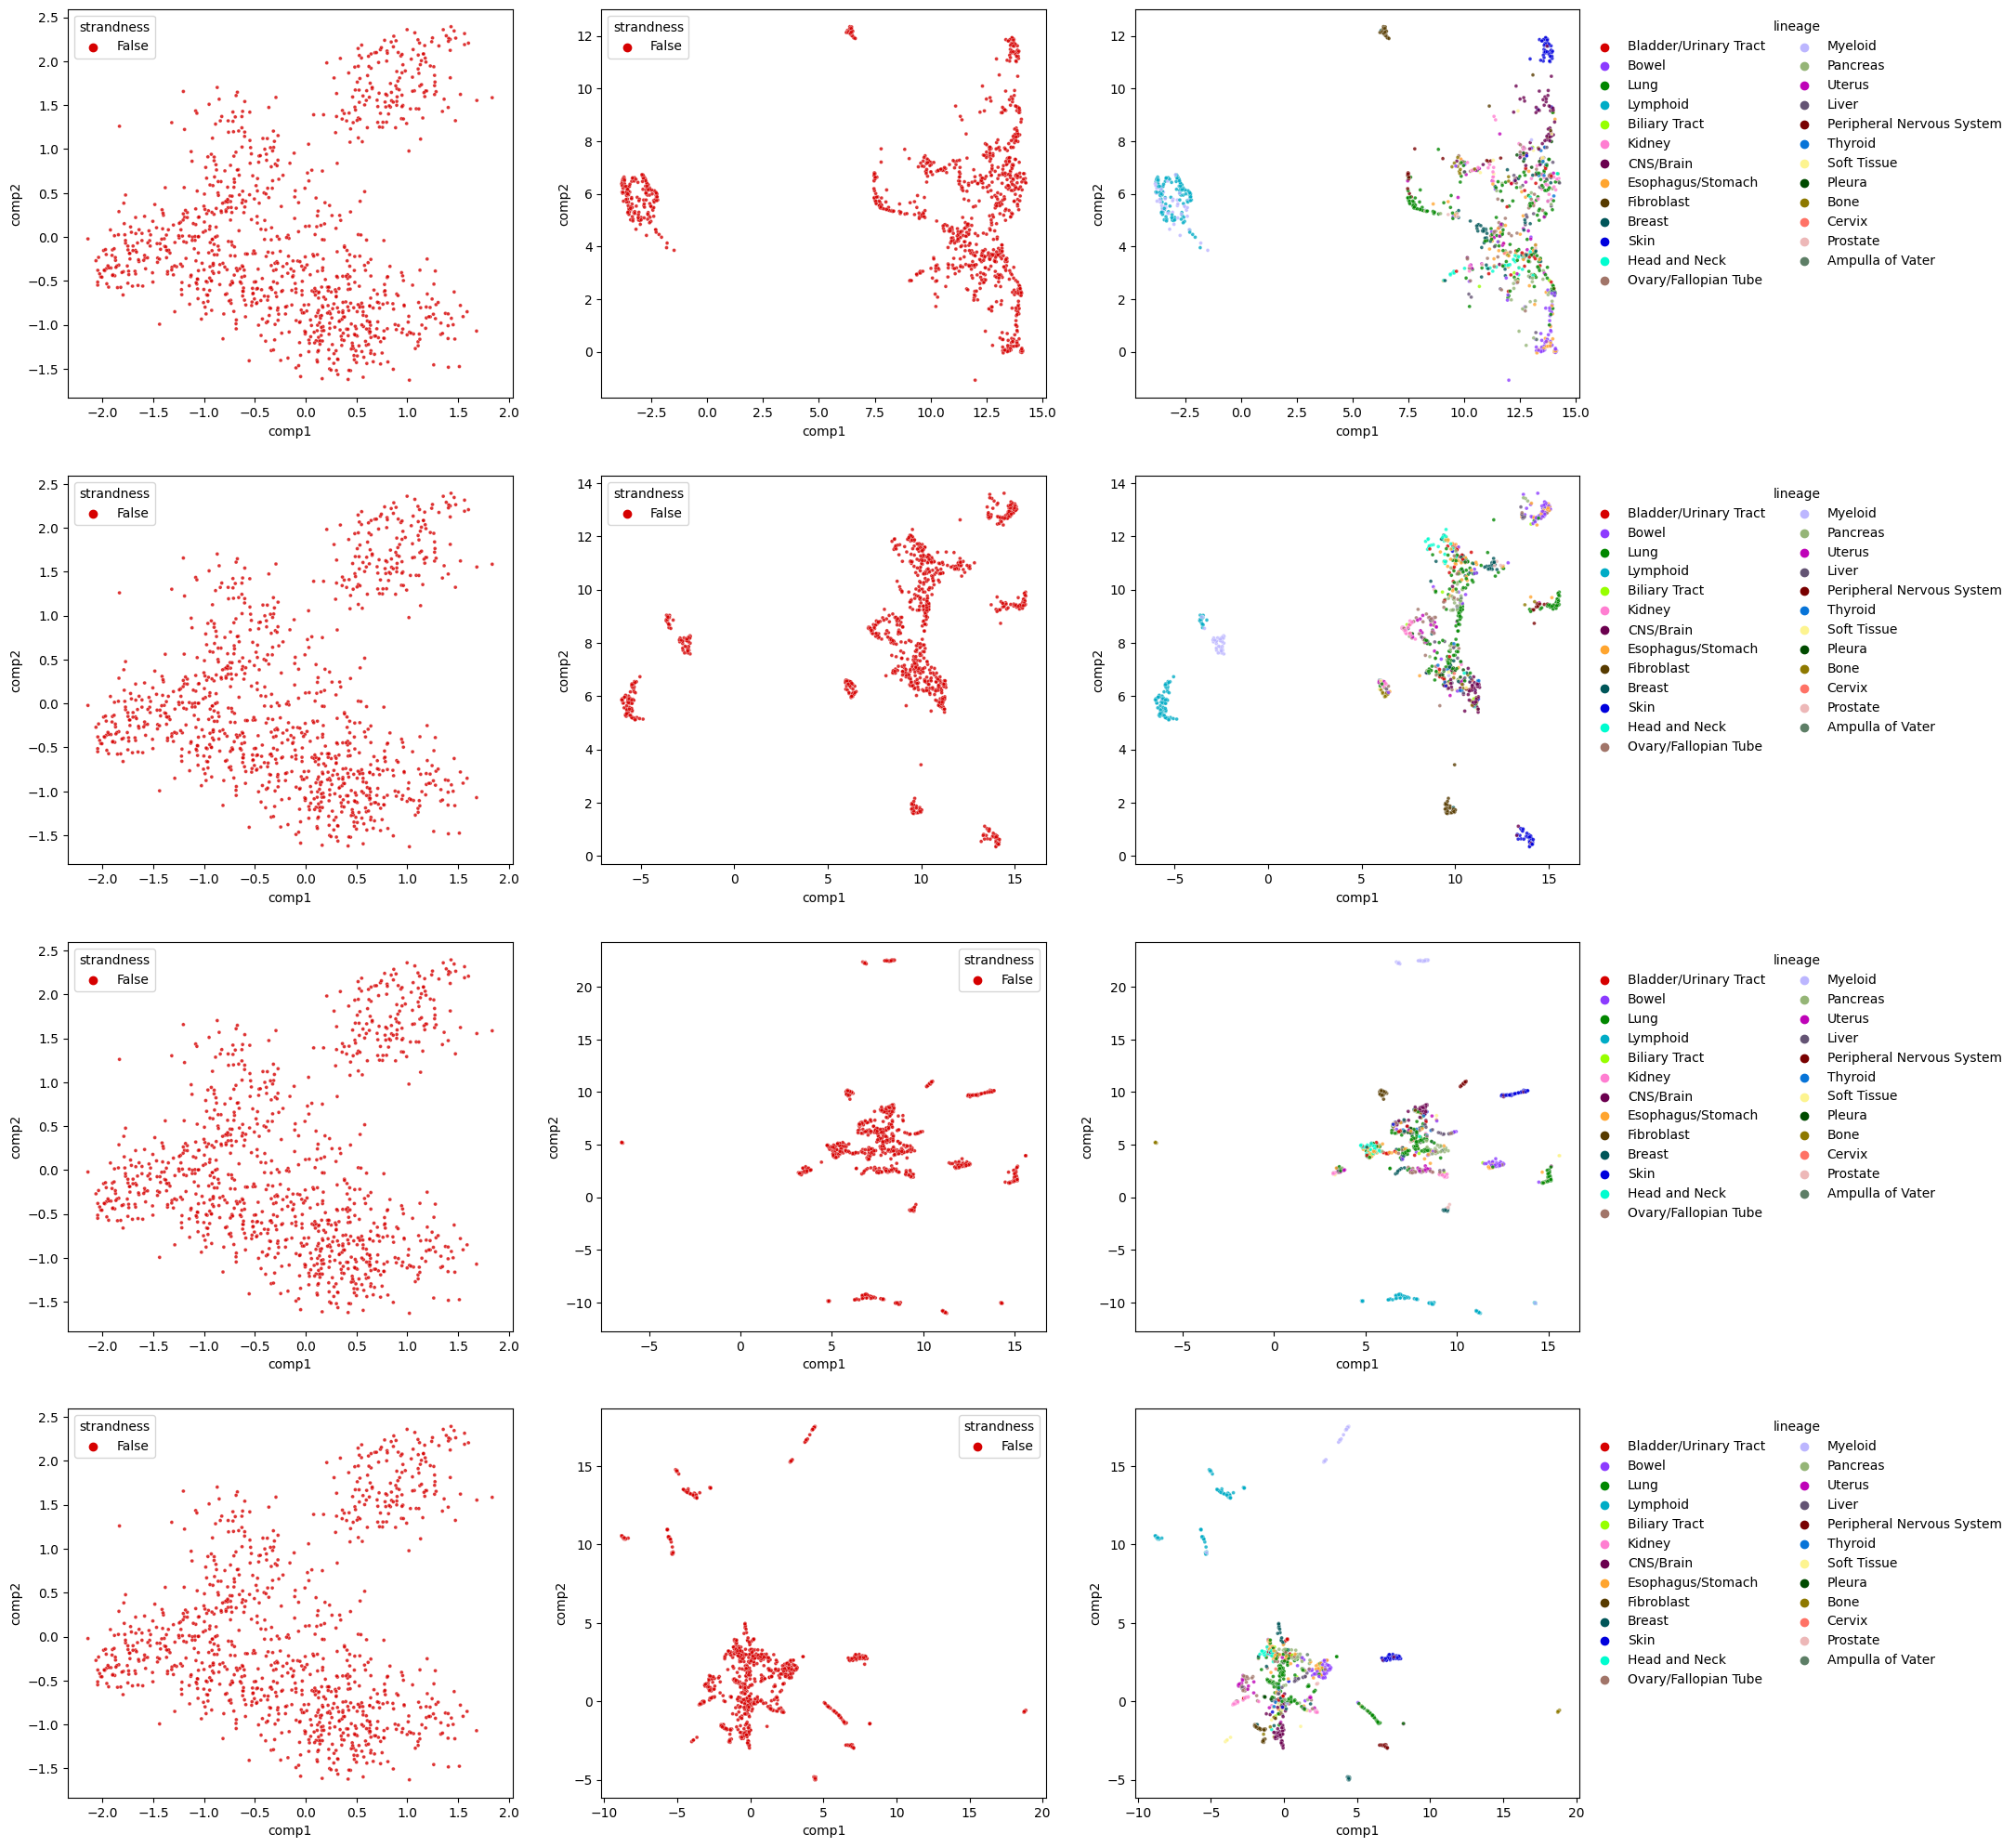

In [63]:
from sklearn.decomposition import PCA
import pandas as pd
import colorcet as cc
import umap
u = umap.UMAP()
palette = sns.color_palette(cc.glasbey, n_colors=33)


fig, ax = plt.subplots(4, 3)
fig.set_size_inches(21, 25)

for i, comp_number in enumerate([5, 10, 30, 100]):
    pca = PCA(n_components=comp_number, whiten=True, random_state=999)
    components = pca.fit_transform(OmicsExpressionAllGenesTPMLogp1Profile)
    pca_plot_data = pd.DataFrame({"comp1": components[:, 0], "comp2": components[:, 1], "lineage": lineage, "strandness": OmicsExpressionAllGenesTPMLogp1Profile.index.map(dict(zip(strand_count_dfs.Profile, strand_count_dfs.loc[:, 'strandness'])))})
    sns.scatterplot(data=pca_plot_data.loc[~pca_plot_data.strandness, :], x="comp1", y="comp2", hue="strandness", alpha=0.8, s=8, ax=ax[i][0], palette=palette)
    
    umap_rna = u.fit_transform(components)
    
    pca_plot_data = pd.DataFrame({"comp1": umap_rna[:, 0], "comp2": umap_rna[:, 1], "lineage": lineage, "strandness": OmicsExpressionAllGenesTPMLogp1Profile.index.map(dict(zip(strand_count_dfs.Profile, strand_count_dfs.loc[:, 'strandness'])))})
    sns.scatterplot(data=pca_plot_data.loc[~pca_plot_data.strandness, :], x="comp1", y="comp2", hue="strandness", alpha=0.8, s=8, ax=ax[i][1], palette=palette)

    pca_plot_data = pd.DataFrame({"comp1": umap_rna[:, 0], "comp2": umap_rna[:, 1], "lineage": lineage, "strandness": OmicsExpressionAllGenesTPMLogp1Profile.index.map(dict(zip(strand_count_dfs.Profile, strand_count_dfs.loc[:, 'strandness'])))})
    sns.scatterplot(data=pca_plot_data.loc[~pca_plot_data.strandness, :], x="comp1", y="comp2", hue="lineage", alpha=0.8, s=8, ax=ax[i][2], palette=palette)
    sns.move_legend(ax[i][2], "upper left", bbox_to_anchor=(1, 1), frameon=False, ncols=2)
